In [1]:
# imports qiskit library with aer simulator, visualizations, and quantum circuits
import numpy as np
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit import transpile
from qiskit.providers.aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit import IBMQ
import ibmqID

ibmq_qasm_simulator
Number of qubits: 32
Number of pending jobs: 0

ibmq_lima
Number of qubits: 5
Number of pending jobs: 419

ibmq_belem
Number of qubits: 5
Number of pending jobs: 15

ibmq_quito
Number of qubits: 5
Number of pending jobs: 34

simulator_statevector
Number of qubits: 32
Number of pending jobs: 0

simulator_mps
Number of qubits: 100
Number of pending jobs: 0

simulator_extended_stabilizer
Number of qubits: 63
Number of pending jobs: 0

simulator_stabilizer
Number of qubits: 5000
Number of pending jobs: 0

ibmq_manila
Number of qubits: 5
Number of pending jobs: 196

ibm_nairobi
Number of qubits: 7
Number of pending jobs: 518

ibm_oslo
Number of qubits: 7
Number of pending jobs: 14



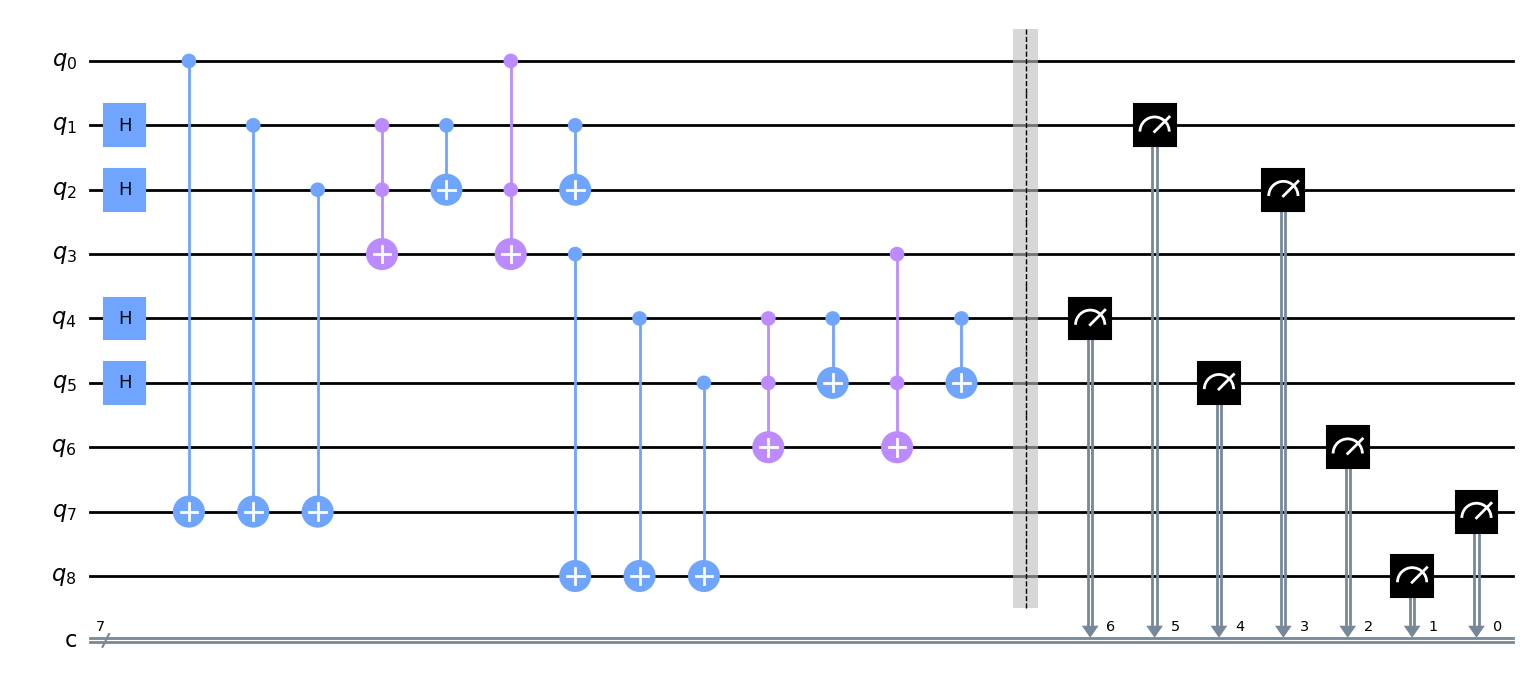

In [2]:
# accesses IBM account ID, laods account and returns the provider object which accesses all of the backends
IBMQ.save_account(ibmqID.token, overwrite=True)
provider = IBMQ.load_account()
myprovider = IBMQ.get_provider()

# prints the information for every backend in the provider (name, number of qubits, and number of pending jobs)
for b in myprovider.backends():
    print(b)
    print("Number of qubits: " + str(b.configuration().n_qubits))
    print ("Number of pending jobs: " + str(b.status().pending_jobs))
    print()
    
# implementation of a ripple carry adder with 2 full adders

circ = QuantumCircuit(9, 7)
circ.h(1)
circ.h(2)
circ.cx(0,7)
circ.cx(1,7)
circ.cx(2,7)
circ.ccx(1,2,3)
circ.cx(1,2)
circ.ccx(0,2,3)
circ.cx(1,2)

circ.h(4)
circ.h(5)
circ.cx(3,8)
circ.cx(4,8)
circ.cx(5,8)
circ.ccx(4,5,6)
circ.cx(4,5)
circ.ccx(3,5,6)
circ.cx(4,5)
circ.barrier(range(9))

circ.measure(4, 6)
circ.measure(1, 5)

circ.measure(5, 4)
circ.measure(2, 3)

circ.measure(6, 2)
circ.measure(8, 1)
circ.measure(7, 0)


circ.draw('mpl')

In [3]:
# aquires the specified backend, transpiles 'circ' for the toppology of the specified backend
# creates a job and adds it to that queue to be ran 100 times
backend = myprovider.get_backend('ibmq_qasm_simulator')
instructions = transpile(circ, backend)
simulation = backend.run(instructions, shots=100)

In [4]:
# can be ran intermitently to obtain the progress of the job in the queue
print(simulation.queue_info())

None


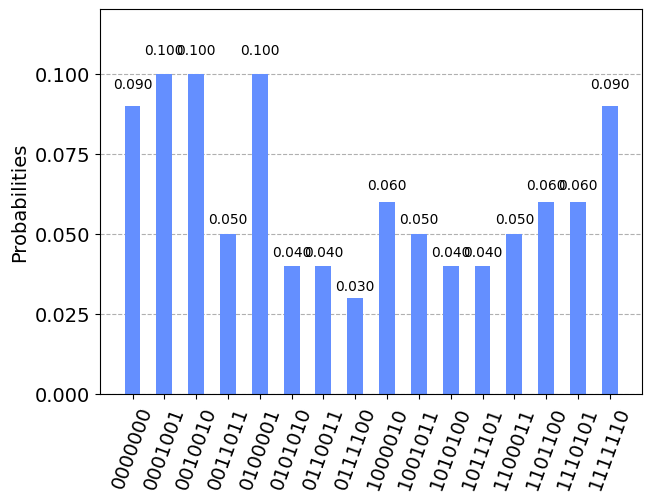

In [5]:
# obtains the results of the 100 runs and plots the histogram of all of the output configurations
results = simulation.result()
counts = results.get_counts(instructions)
plot_histogram(counts)